In [1]:
import os 
import sys
sys.path.append('..')

In [2]:
import scripts.ts_forecast as ts

In [3]:
# Load data
df = ts.load_tesla_cleaned_data('../data/cleaned/TSLA_cleaned.csv')

In [4]:
# Split data
train, test = ts.train_test_split(df)

In [5]:
# Fit models
arima_model = ts.fit_arima(train['Adj Close'])
lstm_model, scaler, look_back = ts.fit_lstm(train['Adj Close'], epochs=50)

Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0151 - val_loss: 0.0020
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0011 - val_loss: 9.6758e-04
Epoch 10/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 9.5287e-04 - val_loss: 0.0013
Epoch 11/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 9.8368e-04 - val_loss: 9.0788e-04
Epoch 12/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/

In [6]:
# Forecast
arima_forecast, _ = ts.forecast_arima(arima_model, len(test), test.index)
lstm_forecast = ts.forecast_lstm(lstm_model, scaler, train['Adj Close'], look_back, len(test), test.index)

In [7]:
#  Hyperparameter tuning
tuning_results = ts.tune_lstm_hyperparameters(train['Adj Close'], test['Adj Close'])
print(tuning_results)

Training LSTM with look_back=30, epochs=20, units=32
Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0201 - val_loss: 0.0025
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 9/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 10/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0012 - val_loss: 9.9757e-04
Epoch 11/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0011 - val_loss: 9.2843e-04
Ep

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0113 - val_loss: 0.0014
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 9.9972e-04 - val_loss: 0.0010
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 9.7601e-04 - val_loss: 9.1248e-04
Epoch 9/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 9.5290e-04 - val_loss: 0.0010
Epoch 10/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 8.7458e-04 - val_loss: 8.0284e-04
Epoch 11/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 9.2138e-04 - val_loss: 0.0016
Epoch 12/20
60/60 ━━━━━━━━━━━━━━━━━

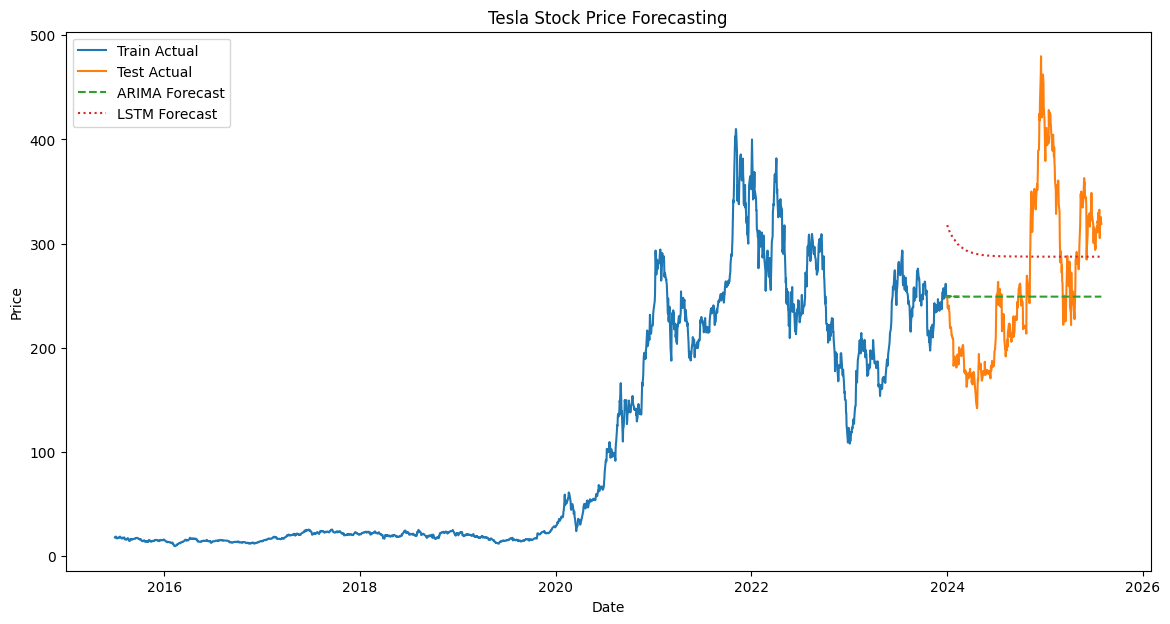


Discussion:
- ARIMA performed better in terms of RMSE. This indicates that the classical statistical model captured the linear and autoregressive structure of Tesla stock prices reasonably well.
- ARIMA models are generally more interpretable and faster to train, while LSTMs require more tuning and computational resources.
- The choice between ARIMA and LSTM depends on the trade-off between interpretability, computational complexity, and forecasting accuracy.
- Further tuning and additional data features might improve LSTM performance.


In [8]:
# Choose best LSTM params based on lowest RMSE
best_params = tuning_results.loc[tuning_results['RMSE'].idxmin()]
lstm_params = {
   'look_back': int(best_params['look_back']),
     'epochs': int(best_params['epochs']),
    'units': int(best_params['units'])
}

# Compare models
ts.compare_models(train, test, arima_model, lstm_params)

In [9]:
# Evaluate
ts.evaluate_forecasts(test['Adj Close'], arima_forecast)
ts.evaluate_forecasts(test['Adj Close'], lstm_forecast)

(74.52911183803896, 95.15685385725985, 25.933356323921362)

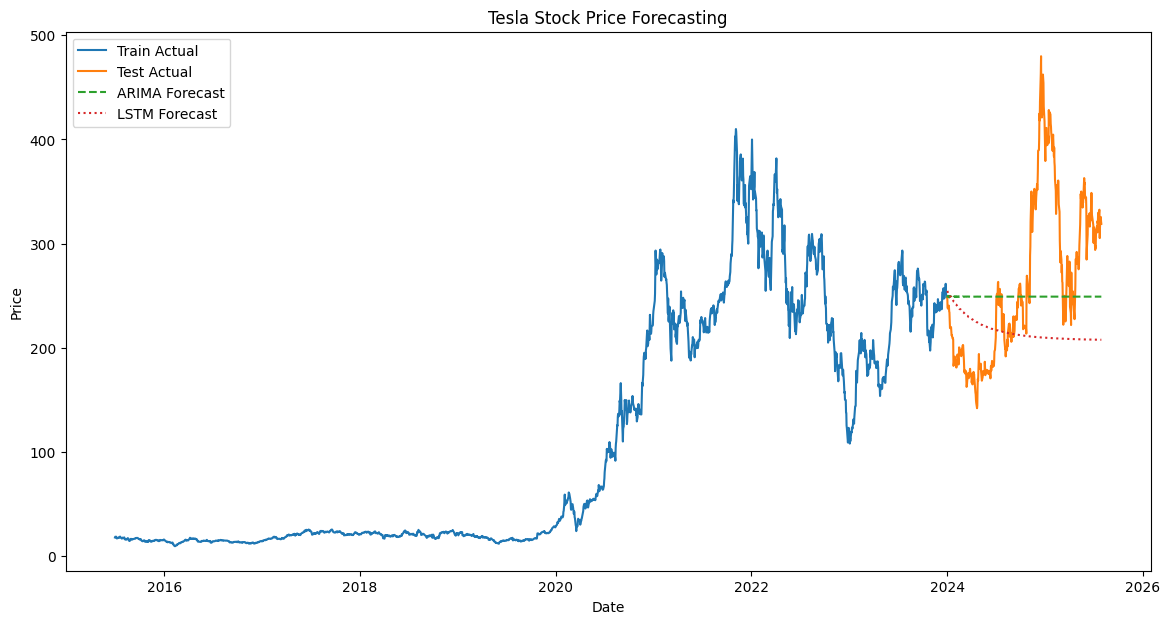

In [10]:
# Plot results
ts.plot_forecasts(train, test, arima_forecast, lstm_forecast)